In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Neural Networks

This is what a *neuron cell* in your brain looks like:   
(well, this is a cartoon of a neuron)

<img src='Imgs/neuron_cells_synapse.jpg' width=600 align='left'>

$~$

We can make a functional diagram of a neuron:

<img src='Imgs/biological_v_artificial_neuron.png' width=900 align='left'>

## Neural network approach to Regression

Consider the Neural Network below:
    
Here, the "output", $\hat y = {\bf w}\cdot {\bf \mathbb{x}} = w_0 + w_1 x$ 

<img src="Imgs/linregNN2.png" width=400 align='left'>

### Training the neuron

* Start with *random* initial $w_0$ and $w_1$, $~~~$ (*i.e.* ${\bf w}_{t=0}$)
* Set the *Learning Rate*, $\eta$, to a small number ($\sim 0.01$)
* LOOP
    * for each datum $i$ (row in your data):  
        * expose neuron to ${\bf x}_i$, compute $\hat y_i$ with existing $w_0$ and $w_1$ 
        * compute $\Delta {\bf w}_{t} = \eta(y_i - \hat y_i){\bf \mathbb{x}}^i$
        * update ${\bf w}_{t+1} = {\bf w} + \Delta{\bf w}$
        * compute new $\hat y_i$        

In [1]:
eta = 0.01
w = np.random.random(size=2)
print('initial w =', w)

def neuron(xi, w):
    return w[0] + xi * w[1:]

initial w = [0.997 0.359]


### Update the $\bf w$'s by exposing the neuron to each datum.

Get our previous data back:

In [2]:
r = np.random.RandomState(123)

w0 = 2
w1 = 0.5

N = 20

x = np.linspace(0,5,N)
y = w1*x + w0 + r.normal(0,0.3,N)


<IPython.core.display.Javascript object>


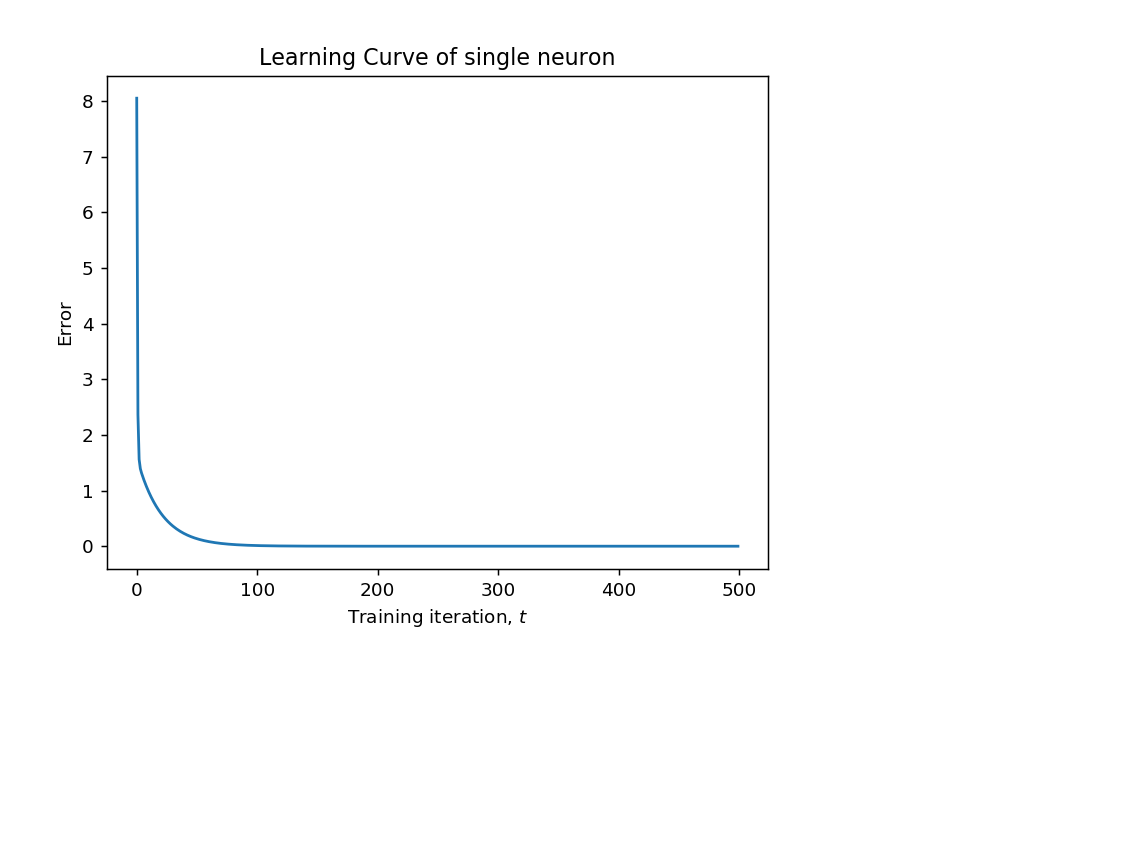

In [3]:
error = []
err = 0

for k in range(500):
    err=0
    for xi, yi in zip(x, y):
#        print('w', w)
        dw = eta*(yi - neuron(xi, w))
#       print('dw/eta', dw/eta)
        w[0] += dw
        w[1:] += dw*xi
#        print('wnew', w)
        err += dw/eta/2
#        print('err',err)
    error.append(err)

%matplotlib notebook

plt.plot(np.arange(len(error)), error, '-')
plt.title('Learning Curve of single neuron')
plt.xlabel('Training iteration, $t$')
plt.ylabel('Error');

Recall that our true values for $w_0$ and $w_1$ are:

$w_0 = 2$

$w_1 = \frac{1}{2}$

and the linear regression computation gave us: $w_0 = 1.8$ and $w_1 = 0.6$.

In [4]:
w

array([1.807, 0.597])

*Booya!*

---

# Classifiers: Adding an *Activation Function*

If the output $\hat y = {\bf w} \cdot {\bf x}$ is is passed through a *Step Function* of some kind,   
the neuron can be used as a *Classifier*.

<img src='Imgs/trainPerceptron.jpg' width=900 align='left'>

Putting many neurons together, one can classify data with a very complex *decision boundary*.

<img src='Imgs/NN1.gif' height=400 align='left'>

---

## Neural Nets allow complex *non-linear models*, and *decision boundaries* between classes

<img src='Imgs/decision_boundary1.png'>

## Deep Neural Nets

$~$

<img src='Imgs/deepNN.png' width=700 align='left'>

For example:

<img src='Imgs/deepNN2.png' width=700 align='left'>